In [1]:
from h5py import File as H5File
from PIL import Image
from keras.layers import Input
from keras.models import Model, Sequential
import matplotlib.pylab as plt
import numpy as np
from skimage.exposure import equalize_hist

import blusky.datasets as datasets
from blusky.transforms.cascade_2d import Cascade2D
from blusky.transforms.default_decimation import DefaultDecimation

from blusky.wavelets.i_wavelet_2d import IWavelet2D
from blusky.wavelets.morlet2d import Morlet2D

Using TensorFlow backend.
/Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
wav1 = Morlet2D(sample_rate=0.004, 
               center_frequency=90., 
               bandwidth=(50.,25.), 
               crop=3.5,
               taper=False)

wav2 = Morlet2D(sample_rate=0.004, 
               center_frequency=45., 
               bandwidth=(40.,20), 
               crop=3.5,
               taper=False)

wav3 = Morlet2D(sample_rate=0.004, 
               center_frequency=22.5, 
               bandwidth=(20,10.), 
               crop=3.5,
               taper=False)


inp = Input(shape=(99,99,1))
cascade = Cascade2D("none", 0, 
                    decimation=DefaultDecimation(oversampling=1),
                    angles=(0.0, 45., 90.), 
                    wavelets=[wav1, wav2, wav3])

# create the transform
result = cascade.transform(inp)

model = Model(inputs=inp, outputs=result)
model.summary()

W0827 10:02:01.406101 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 10:02:01.417341 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 10:02:01.426253 4321104768 deprecation.py:323] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/tensorflow/python/ops/variables.py:2618: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


xpsi1
1 1 (13, 13, 1, 3)
1 1 (13, 13, 1, 3)
xpsi2
1 2 (17, 17, 1, 3)
1 2 (17, 17, 1, 3)
xpsi3
1 4 (33, 33, 1, 3)
1 4 (33, 33, 1, 3)
xpsi1psi2
1 2 (17, 17, 3, 3)
1 2 (17, 17, 3, 3)
xpsi1psi3
1 4 (33, 33, 3, 3)
1 4 (33, 33, 3, 3)
xpsi2psi3
2 4 (16, 16, 3, 3)
2 4 (16, 16, 3, 3)
xpsi1psi2psi3
2 4 (16, 16, 9, 3)
2 4 (16, 16, 9, 3)
Layer 0
( x, 0 )
Layer 1
( |x*psi_1|, 1 )
( |x*psi_2|, 2 )
( |x*psi_3|, 3 )
Layer 2
( ||x*psi_1|*psi_2|, 2 )
( ||x*psi_1|*psi_3|, 3 )
( ||x*psi_2|*psi_3|, 3 )
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 99, 99, 1)    0                                            
__________________________________________________________________________________________________
depthwise_conv2d_1 (DepthwiseCo (None, 99, 99, 3)    510         input_1[0][0]                    
__________________

In [19]:
imgs.shape

(12, 99, 99, 1)

In [3]:
from os import path

imgs = []
for label in ['chaotic', 'fault', 'salt', 'horizon']:
    for im in range(0,3):
        data = path.join(
            path.join(path.dirname(datasets.__file__), "test_tiles"), "{}{}.png".format(label, im)
        )
        data = np.array(Image.open(data)).astype(np.float32)
        data /= np.max(data)
        
        imgs.append(data)
imgs = np.array(imgs)
imgs.shape = list(imgs.shape) + [1]

In [4]:
result = model.predict(imgs)

W0827 10:16:42.447720 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0827 10:16:42.450963 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0827 10:16:42.451621 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



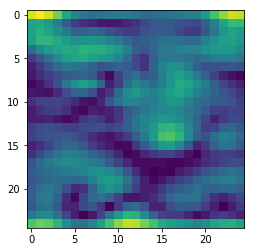

In [17]:
plt.figure()
plt.imshow(result[4][-1,:,:,2])
plt.show()